In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt 
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10,5]
plt.style.use('ggplot')  

This notebook aims to apply the parametric Value at Risk technique, discussing its conditions and limitations. The topics will be discussed in the following order:
* Introduction and explanation of the method;
* Risk assessment of a stock using the real price time series of the asset;
* Risk assessment of a stock portfolio using the real price time series of the assets;
* Method validation using a sliding window and comparison with real outcomes

# Value at Risk(VaR)

### Introduction to Value as Risk

The Value at Risk (VaR) represents the maximum expected loss of a stock, set of stocks, or index with significance $\alpha$. VaR answers the question 'How much can I lose with $\alpha$ probability over a predefined time horizon?', meaning that after observing an asset for a certain period, how much of the capital would I lose if an event of probability $\alpha$ occurred.

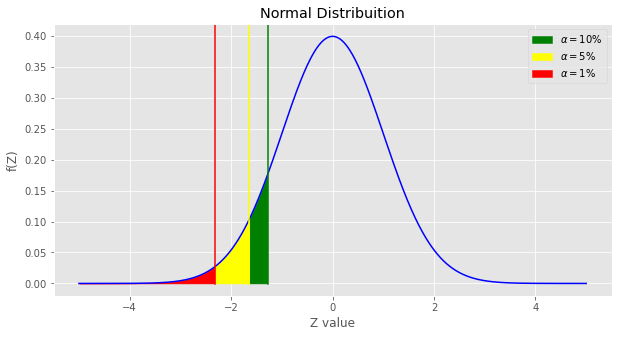

In [5]:
# Parameters and Data
mean = 0
std = 1
x = np.linspace(-5, 5, 1000)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))

# Creating graph
plt.plot(x, y, color='blue')

# Filling area 
plt.fill_between(x, y, where=((x < -1.28155)&(x >-1.64485)), color='green', alpha=1,label = r'$\alpha = 10$%')
plt.fill_between(x, y, where=((x <-1.64485)&(x >-2.32635 )), color='yellow', alpha=1,label = r'$\alpha = 5$%')
plt.fill_between(x, y, where=((x < -2.32635)), color='red', alpha=1, label = r'$\alpha = 1$%')

plt.axvline(x = -1.28155, color = 'green',ymin=0.0425)
#plt.text(-1.18155,0.4,'Z=-1.18155')
plt.axvline(x = -1.64485, color = 'yellow',ymin=0.0425)
#plt.text(-1.64485,0.35,'Z=-1.64485')
plt.axvline(x = -2.32635, color = 'red',ymin=0.0425)
#plt.text(-2.32635,0.3,'Z=-2.32635')


plt.xlabel('Z value')
plt.ylabel('f(Z)')
plt.title('Normal Distribuition')
plt.legend()

plt.grid(True)
plt.show()

## Stock Risk Assessment

In [12]:
start_date = dt.datetime(2022, 1, 1)# Look for other windows of 2y (like 2017)
ticker = yf.Ticker("ELET3.SA")
serie = ticker.history(period="2y",start=start_date)
serie.drop(serie.loc[serie['Open']==0].index,inplace=True) # Droping 0 values for stock price
data_series[f'{stock}'] = serie['Open'].values

In [14]:
data_series.describe()

,ELET3.SA
count,503.000000
mean,39.118400
std,4.819836
min,28.656190
25%,34.910000
50%,39.180000
75%,42.781346
max,50.968021


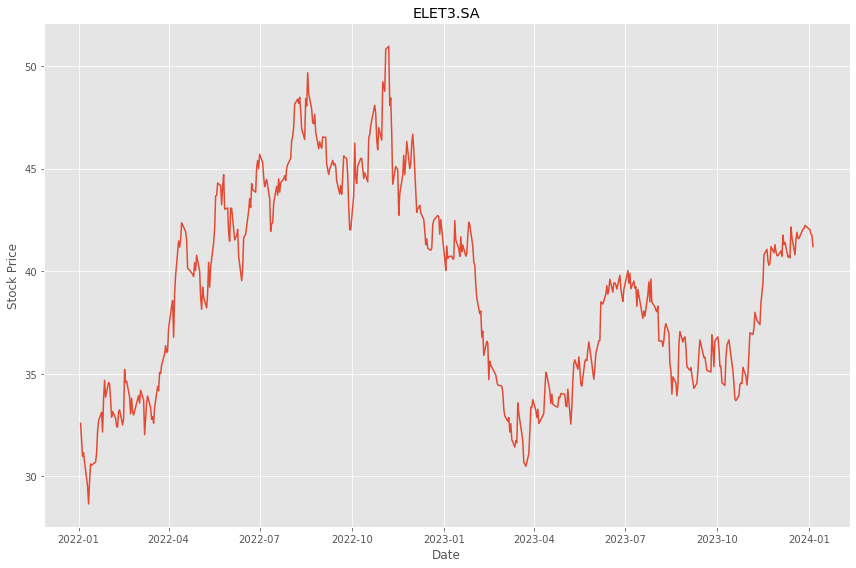

In [13]:
fig = plt.figure(figsize=(12,8))
plt.title('ELET3.SA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(serie.index[0:-1],data_series['ELET3.SA'].values[0:-1])
plt.tight_layout()

Text(0.5, 1.0, 'Daily Return Distribution')

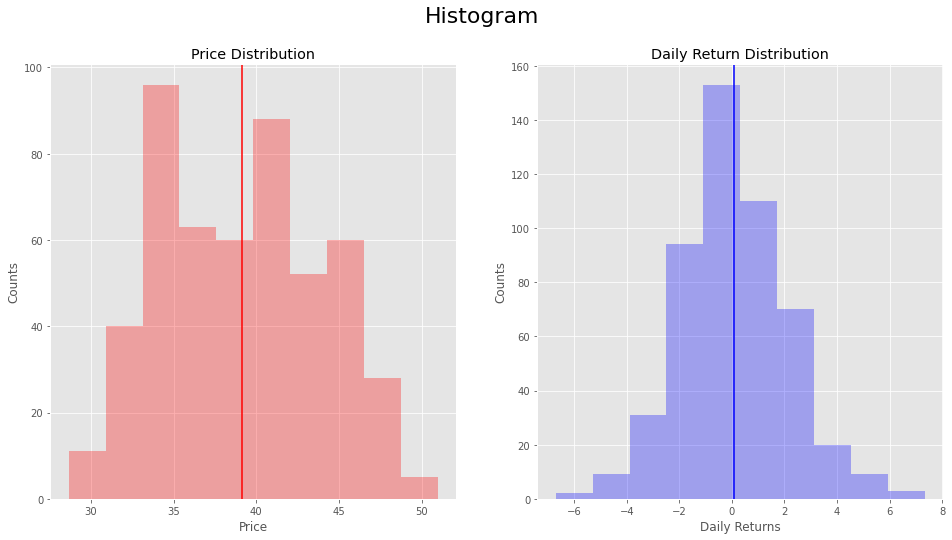

In [16]:
Price = data_series['ELET3.SA'].values
Daily_return = data_series['ELET3.SA'].pct_change().values[1:-1]*100


fig, axs = plt.subplots(1,2,figsize = (16,8))

plt.suptitle('Histogram',fontsize = 22)
axs[0].hist(Price, bins = 'sturges', alpha = 0.3,color = 'red')
axs[0].axvline(Price.mean(),color = 'red')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Counts')
axs[0].set_title('Price Distribution')

##
axs[1].hist(Daily_return, bins = 'sturges', alpha = 0.3,color = 'blue')
axs[1].axvline(Daily_return.mean(),color = 'blue')
axs[1].set_xlabel('Daily Returns')
axs[1].set_ylabel('Counts')
axs[1].set_title('Daily Return Distribution')


## Portifolio Risk Assessment

This section is to apply the method to a Portifolio, using the set of stocks in the Electric Power Index(IEE) as Stock Portifolio. The stocks in the index at 10/01/2023 are:
* AESB3	   (AES)
* ALUP11   (ALUPAR)
* AURE3	   (AUREN)
* CMIG4	   (CEMIG)	
* COCE5	   (COELCE)	
* CPLE6	   (COPEL)
* CPFE3	   (CPFL ENERGIA)
* ELET3	   (ELETROBRAS)
* ENGI11   (ENERGISA)
* ENEV3	   (ENEVA)
* EGIE3	   (ENGIE BRASIL)
* EQTL3	   (EQUATORIAL)
* NEOE3	   (NEOENERGIA)	
* SRNA3	   (SERENA)
* TAEE11   (TAESA)
* TRPL4    (TRAN PAULIST)

In real life, the stocks that make up the index are not fixed, they depend on some factors. For simplification purposes, the same stocks will stay throughout the analyzed period.

In [67]:
start_date = dt.datetime(2023, 1, 1)# Look for other windows of 2y (like 2017)
data_series = pd.DataFrame()
# Split treatment is needed 

stocks = ['AESB3', 'ALUP11','AURE3','CMIG4','COCE5','CPLE6','CPFE3','ELET3','ENGI11','ENEV3','EGIE3','EQTL3','NEOE3','SRNA3','TAEE11','TRPL4']
partitions = [6.203 , 6.179 , 6.260 , 6.609 , 5.946 , 6.157 , 6.185 , 6.098 , 6.392 , 6.066 , 6.115 , 6.116 , 6.559 , 6.376 , 6.296 , 6.443] 
for i in range(0,len(stocks)):
    stock = stocks[i]
    weight = partitions[i]
    ticker = yf.Ticker(stock+'.SA')
    serie = ticker.history(period="2y",start=start_date)
    serie.drop(serie.loc[serie['Open']==0].index,inplace=True) # Droping 0 values for stock price
    if(len(serie['Open'].values) != 0 ):
        print(stock)
        data_series[f'{stock}'] = weight*serie['Open']/100
    else:
        print(f'{stock} data not avaible')
data_series.fillna(method='ffill', inplace=True)
data_series['Total'] = data_series.sum(axis=1)


AESB3
ALUP11
AURE3
CMIG4
COCE5
CPLE6
CPFE3
ELET3
ENGI11
ENEV3
EGIE3
EQTL3
NEOE3
SRNA3
TAEE11
TRPL4


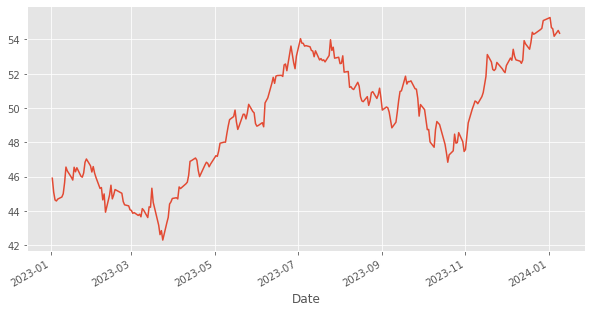

In [69]:
data_series['Total'] = data_series.sum(axis=1)
data_series['Total'].plot()

In [72]:
data_series.isna().sum()

AESB3     0
ALUP11    0
AURE3     0
CMIG4     0
COCE5     0
CPLE6     0
CPFE3     0
ELET3     0
ENGI11    0
ENEV3     0
EGIE3     0
EQTL3     0
NEOE3     0
SRNA3     0
TAEE11    0
TRPL4     0
Total     0
dtype: int64

In [73]:
data_series

,AESB3,ALUP11,AURE3,CMIG4,COCE5,CPLE6,CPFE3,ELET3,ENGI11,ENEV3,EGIE3,EQTL3,NEOE3,SRNA3,TAEE11,TRPL4,Total
Date,,,,,,,,,,,,,,,,,
2023-01-02,0.598589,1.554521,0.740780,0.655021,2.614639,0.462914,1.853201,2.474913,2.639026,0.713362,2.159909,1.625929,0.923557,0.604445,1.976906,1.356873,45.909169
2023-01-03,0.589285,1.536711,0.735176,0.643187,2.592772,0.452838,1.818085,2.441591,2.585193,0.679392,2.126223,1.576420,0.900168,0.571290,1.959805,1.340347,45.096964
2023-01-04,0.574398,1.526136,0.726515,0.633128,2.492891,0.452245,1.808457,2.514293,2.546481,0.671506,2.119942,1.552270,0.892972,0.554712,1.938714,1.316739,44.642796
2023-01-05,0.576879,1.520570,0.735685,0.643187,2.447974,0.458765,1.830545,2.477336,2.519262,0.701836,2.121655,1.545629,0.899914,0.555350,1.941564,1.315559,44.583419
2023-01-06,0.574398,1.511665,0.742308,0.643779,2.524805,0.453430,1.823749,2.482789,2.489019,0.711542,2.099388,1.552270,0.884661,0.562363,1.986597,1.304935,44.695397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0.740638,1.889538,0.832580,0.751443,2.485428,0.624935,2.375658,2.548964,3.360274,0.806778,2.715671,2.143658,1.352473,0.669480,2.361112,1.687422,54.692109
2024-01-04,0.744980,1.888920,0.841970,0.758052,2.491374,0.620626,2.376896,2.545915,3.325758,0.809204,2.721175,2.147939,1.344117,0.645251,2.366666,1.679690,54.617067
2024-01-05,0.745601,1.880270,0.835084,0.752104,2.468185,0.613853,2.365144,2.512376,3.289962,0.803745,2.713225,2.113078,1.332133,0.631224,2.351556,1.684200,54.183480


## Validation